# A Demo and Comparison of Categorical Methods

**The feature engineering step is arguably the most intensive and manual component of designing and completing a machine learning model from a dataset. Within feature engineering itself, categorical encoding is an essential part of nearly every dataset, but often comes with its own challenges.**

In this notebook, we will be exploring where and when to apply different categorical methods. Specifically, we will be applying a number of categorical methods to a dataset, and then comparing the resulting performance of each of the categorical methods. For a detailed guide on the when/how of using categorical methods, check out [this comprehensive notebook](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb).

Specifically for this demo, we will be using the dataset located at https://www.kaggle.com/c/instacart-market-basket-analysis/data. For the purposes of this demo, we will not be detailing every single step involved in the machine learning process. For that, check out [this comprehensive demo](https://github.com/Featuretools/predict-next-purchase) by Feature Labs, Inc. We will still be outlining several key steps, however.

If you are planning to follow this tutorial yourself, please refer to [this link](https://github.com/Featuretools/predict-next-purchase#running-the-tutorial) for instructions to download/prepare the data. 

In [1]:
import featuretools as ft
from dask import bag
from dask.diagnostics import ProgressBar
import pandas as pd
import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import os

W0717 18:05:25.828810 4634604992 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


## Load EntitySet

This is the first step in loading data into Featuretools. For now, as the entire dataset contains 1.3 million rows, we will load only one partition of our data, which still contains all the relevant information to the users contained in the partition.

In [2]:
es = utils.load_entityset("partitioned_data/part_1/")
es

Entityset: instacart
  Entities:
    order_products [Rows: 156605, Columns: 7]
    orders [Rows: 16328, Columns: 3]
    users [Rows: 1000, Columns: 2]
  Relationships:
    order_products.order_id -> orders.order_id
    orders.user_id -> users.user_id

## Explanation of Data/Problem

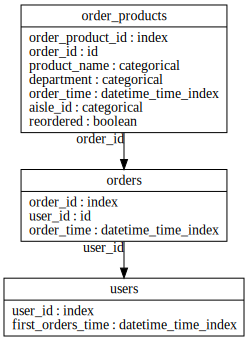

In [4]:
es.plot()

In this dataset, we can see that we're given information about each user, each of their specific orders, and the purchased products themselves. We can see that data columns themselves are not terribly complex, but there are two categoricals that we must account for: `product_name` and `department`.

In the spirit of the Kaggle competition that this originated from, in this notebook, we will predict whether or not a user will purchase a specific product within the next specified time period.

In [13]:
es['order_products'].df['product_name'].describe()

count     156605
unique     15408
top       Banana
freq        2058
Name: product_name, dtype: object

Following our [guide](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb), 15408 unique values is much greater than our suggested <15 cardinality for one-hot encoding, forcing us to possibly consider other methods. 